Let's dig this out babay!!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/7031/data.csv")
 

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# newDf.info()

In [ ]:
# newDf.size

In [ ]:
# print( newDf.shape[0], "rows and", newDf.shape[1], "columns.")

In [ ]:
print( df.shape[0], "rows and", df.shape[1], "columns.")

5110 rows and 12 columns.


In [ ]:
newDf = df

In [ ]:
newDf = df.drop(columns=['id']) 


In [ ]:
# print( newDf.shape[0], "rows and", newDf.shape[1], "columns.")

In [ ]:
#duplicate data in dataset, drop the duplicate data
df_duplicates = df[df.duplicated()]
no_dup_df = df.drop(df_duplicates.index)

In [ ]:
no_dup_df.size

61320

In [ ]:
#missing data
missingData = df.isna().sum()
missingData
# newDf=newDf.fillna(np.mean(newDf['bmi']))

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#noisy data age is not whole number
noisyData = newDf.loc[df['age']%1 != 0 ]
len(noisyData['age'])


115

In [ ]:
clean = df.drop(noisyData.index)
newDf = clean.drop(columns=['id']) 
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4995 non-null   object 
 1   age                4995 non-null   float64
 2   hypertension       4995 non-null   int64  
 3   heart_disease      4995 non-null   int64  
 4   ever_married       4995 non-null   object 
 5   work_type          4995 non-null   object 
 6   Residence_type     4995 non-null   object 
 7   avg_glucose_level  4995 non-null   float64
 8   bmi                4800 non-null   float64
 9   smoking_status     4995 non-null   object 
 10  stroke             4995 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 468.3+ KB


In [ ]:
newAge = newDf['age']
newAge

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 4995, dtype: float64

In [ ]:
# calculate Q1, Q3, and display the five-number summary of the data in this code cell
Q1 = (np.percentile(newAge, 25, interpolation ='lower'))
Q3 = (np.percentile(newAge, 75, interpolation ='lower'))
#five-number summary -age
#min, Q1, median, Q3, max
print(np.min(newAge), Q1, np.median(newAge), Q3, np.max(newAge)) 

1.0 27.0 45.0 61.0 82.0


In [ ]:
#five-number summary - avg_glucose_level
#min, Q1, median, Q3, max
newGlu = newDf['avg_glucose_level']
Q1 = (np.percentile(newGlu, 25, interpolation ='lower'))
Q3 = (np.percentile(newGlu, 75, interpolation ='lower'))
newGlu
print(np.min(newGlu), Q1, np.median(newGlu), Q3, np.max(newGlu)) 

55.12 77.35 91.93 114.16 271.74


In [ ]:
#check the labels with heatmap
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()#five-number summary - Bmi
#min, Q1, median, Q3, max
newDf=newDf.fillna(np.mean(newDf['bmi']))
newBmi = newDf['bmi']
Q1 = (np.percentile(newBmi, 25, interpolation ='lower'))
Q3 = (np.percentile(newBmi, 75, interpolation ='lower'))
newGlu
print(np.min(newBmi), Q1, np.median(newBmi), Q3, np.max(newBmi)) 

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [ ]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
gender =  df['gender'].value_counts()
gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

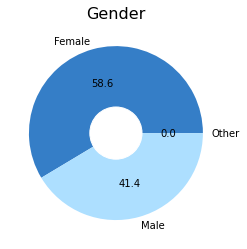

In [ ]:

def absolute_value(val):
    a  = np.round(val/100.*newDf['gender'].value_counts().sum(), 0)
    return a
plt.title("Gender", x = 0.5, fontsize = 16)
colors = ['#357EC7','#ADDFFF','#87CEFA','#488AC7']
outL = plt.pie(gender, labels = gender.index, colors = colors, autopct='%.1f')
circle = plt.Circle((0,0), 0.3, color = 'white')
donut = plt.gcf()
donut.gca().add_artist(circle)

In [ ]:
Female = df.loc[df["gender"] == "Female"]
Male = df.loc[df["gender"] == "Male"]

In [ ]:
Female["stroke"].value_counts()

0    2853
1     141
Name: stroke, dtype: int64

In [ ]:
Male["stroke"].value_counts()

0    2007
1     108
Name: stroke, dtype: int64

In [ ]:
heart_d = df.loc[df["heart_disease"] == 1]

In [ ]:
heart_d["stroke"].value_counts()

0    229
1     47
Name: stroke, dtype: int64

In [ ]:
married = df.loc[df["ever_married"] == "Yes"]

In [ ]:
married["stroke"].value_counts()

0    3133
1     220
Name: stroke, dtype: int64

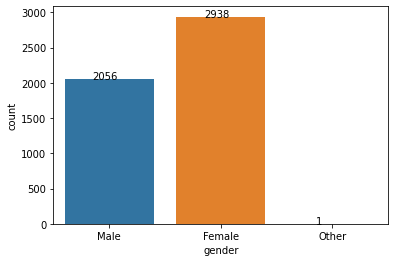

In [ ]:
ax = sns.countplot(x="gender",data = newDf)

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.1))
plt.show()

In [ ]:
newDf["age"].min()

1.0

In [ ]:
newDf["age"].max()

82.0

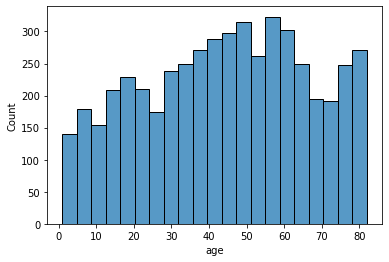

In [ ]:

sns.histplot(data = newDf.age)

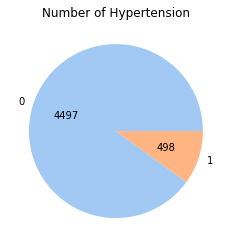

In [ ]:
colors = sns.color_palette('pastel')[0:4]

hyper = newDf['hypertension'].value_counts().index
number = newDf['hypertension'].value_counts()

plt.pie(number, labels = hyper, colors = colors, autopct = lambda x: '{:.0f}'.format(x*number.sum()/100))

plt.title("Number of Hypertension")
plt.show()

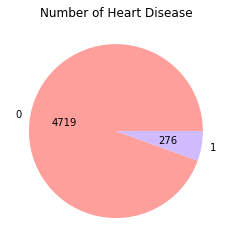

In [ ]:
colors = sns.color_palette('pastel')[3:6]

hyper = newDf['heart_disease'].value_counts().index
number = newDf['heart_disease'].value_counts()

plt.pie(number, labels = hyper, colors = colors, autopct = lambda x: '{:.0f}'.format(x*number.sum()/100))

plt.title("Number of Heart Disease")
plt.show()

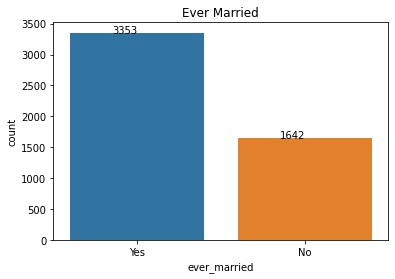

In [ ]:
ax = sns.countplot(x="ever_married",data = newDf)

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.1))

plt.title("Ever Married")
plt.show()

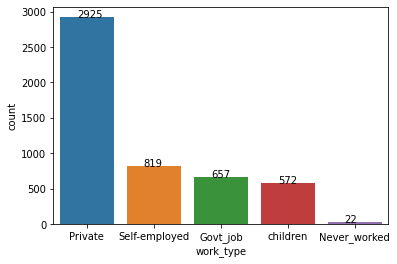

In [ ]:
ax = sns.countplot(x="work_type",data = newDf)

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.1))
plt.show()

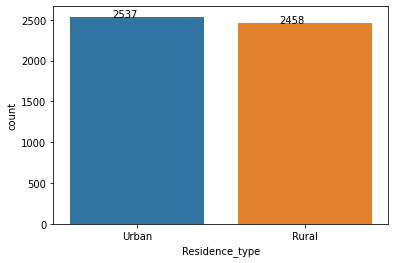

In [ ]:
ax = sns.countplot(x="Residence_type",data = newDf)

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.1))
plt.show()

In [ ]:
newDf["avg_glucose_level"].min()

55.12

In [ ]:
newDf["avg_glucose_level"].max()

271.74

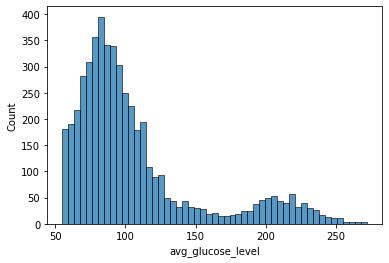

In [ ]:
sns.histplot(data = newDf.avg_glucose_level)

In [ ]:
newDf["bmi"].min()

11.3

In [ ]:
newDf["bmi"].max()

97.6

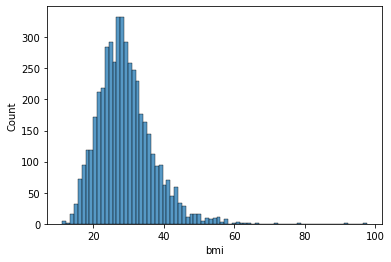

In [ ]:
sns.histplot(data = newDf.bmi)

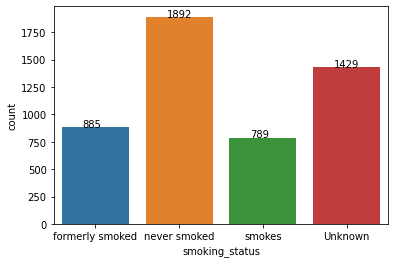

In [ ]:
ax = sns.countplot(x="smoking_status",data = newDf)

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25, p.get_height()+0.1))
plt.show()

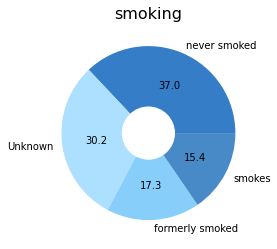

In [ ]:

def absolute_value(val):
    a  = np.round(val/100.*newDf['smoking_status'].value_counts().sum(), 0)
    return a

smoking =  df['smoking_status'].value_counts()

plt.title("smoking", x = 0.5, fontsize = 16)
colors = ['#357EC7','#ADDFFF','#87CEFA','#488AC7']
outL = plt.pie(smoking, labels = smoking.index, colors = colors, autopct='%.1f')
circle = plt.Circle((0,0), 0.3, color = 'white')
donut = plt.gcf()
donut.gca().add_artist(circle)

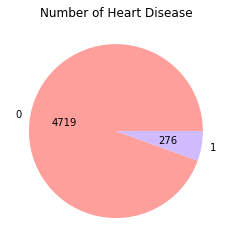

In [ ]:
colors = sns.color_palette('pastel')[3:6]

hyper = newDf['heart_disease'].value_counts().index
number = newDf['heart_disease'].value_counts()

plt.pie(number, labels = hyper, colors = colors, autopct = lambda x: '{:.0f}'.format(x*number.sum()/100))

plt.title("Number of Heart Disease")
plt.show()

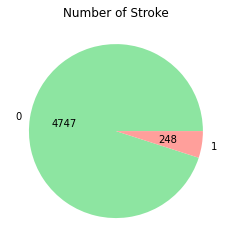

In [ ]:
colors = sns.color_palette('pastel')[2:8]


hyper = newDf['stroke'].value_counts().index
number = newDf['stroke'].value_counts()

plt.pie(number, labels = hyper, colors = colors, autopct = lambda x: '{:.0f}'.format(x*number.sum()/100))

plt.title("Number of Stroke")
plt.show()

In [ ]:
ndf = newDf[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
corr = ndf.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.273793,0.264496,0.238647,0.295246,0.247975
hypertension,0.273793,1.000000,0.106701,0.173752,0.161924,0.126971
heart_disease,0.264496,0.106701,1.000000,0.161464,0.035239,0.134314
avg_glucose_level,0.238647,0.173752,0.161464,1.000000,0.174219,0.132418
bmi,0.295246,0.161924,0.035239,0.174219,1.000000,0.036813
stroke,0.247975,0.126971,0.134314,0.132418,0.036813,1.000000


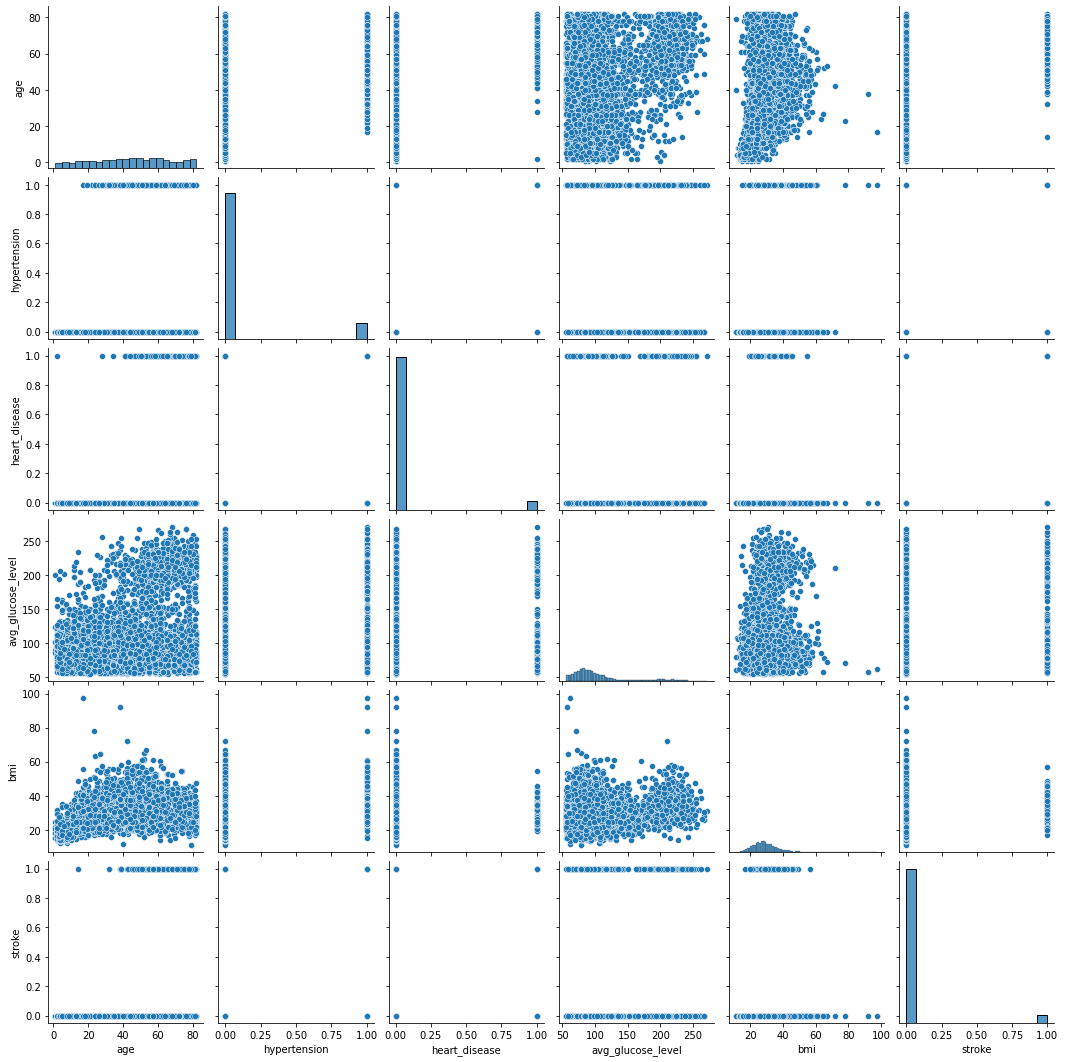

In [ ]:
sns.pairplot(newDf)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# newDf.drop(["smoking_status"], axis=1, inplace=True)
newDf = newDf.fillna(newDf.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [ ]:
le = LabelEncoder()
newDf["gender"] = le.fit_transform(newDf["gender"])
newDf["ever_married"] = le.fit_transform(newDf["ever_married"])
newDf["Residence_type"] = le.fit_transform(newDf["Residence_type"])


In [ ]:
newDf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,29.13125,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,29.13125,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.00000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.60000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.60000,formerly smoked,0


In [ ]:
newDf.value_counts("work_type")

work_type
Private          2925
Self-employed     819
Govt_job          657
children          572
Never_worked       22
dtype: int64

In [ ]:
newDf.value_counts("smoking_status")
newDf = pd.get_dummies(newDf, columns=["smoking_status"])

In [ ]:
newDf = pd.get_dummies(newDf, columns=["work_type"])


In [ ]:
newDf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.13125,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,1,0,0,0,0,1,0


In [ ]:
# X = newDf.drop("stroke", axis=1)
# y = newDf["stroke"]
X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


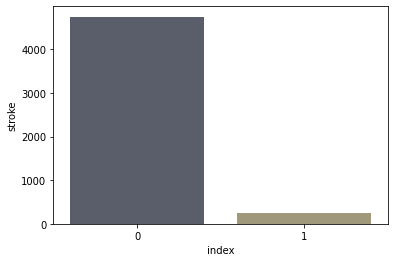

In [ ]:
target_col = ["stroke"]
xx = newDf[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "stroke", data = xx, palette = "cividis")

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

ValueError: ignored

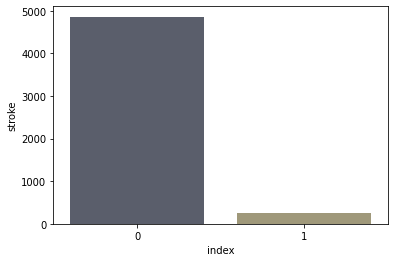

In [ ]:
xx = df[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "stroke", data = xx, palette = "cividis")

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



In [ ]:
#create new Train and Test lists
newTrain = []
newTest = []

from sklearn.neighbors import KNeighborsClassifier

for i in range(1,9):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(X_train,y_train)
    newTrain.append(kNN.score(X_train,y_train))
    newTest.append(kNN.score(X_test,y_test)) 

ValueError: ignored

In [ ]:
#Plot the graphs for both testing and training set
plt.plot(range(1,9), newTest, label = "Testing Accuracy")
plt.plot(range(1,9), newTrain, label = "Training Accuracy")
#label the title, x and y
plt.title("k-NN: Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel(" Accuracy")
#create a table label
plt.legend()

In [ ]:
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])

In [ ]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
predictions_gnb = gnb.predict(X_test)



In [ ]:
score = accuracy_score(y_test, predictions_gnb)
print(score)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score


print(confusion_matrix(y_test, predictions_gnb))
print(classification_report(y_test, predictions_gnb))

In [ ]:
print('F1 score: ', f1_score(y_test, predictions_gnb))

In [ ]:
#check the labels with heatmap

from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, predictions_gnb), annot = True)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_test)


ValueError: ignored

In [ ]:
score = accuracy_score(y_test, predictions_dtc)
print(score)



In [ ]:
from sklearn import *
from sklearn.model_selection import GridSearchCV
#Decision Tree
dt = DecisionTreeClassifier(random_state=101)
dt_params = {'max_depth':[3,5,10,20,30], 'max_leaf_nodes':[3,5,10,20,30]}
clf = GridSearchCV(dt, dt_params, cv = 5, n_jobs =1, verbose = 0)
clf.fit(X_train, y_train)
dt_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree -> The best parameter is", clf.best_params_,"Accuracy: %.6f"%accuracy)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-pa

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, dt_pred))
cf_matrix = confusion_matrix(y_test, dt_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)


# dt = DecisionTreeClassifier(random_state=101)
# dt.fit(X_train, y_train)
# predictions = dt.predict(X_test)
# print(confusion_matrix(y_test, predictions))
# print()
# print(classification_report(y_test, predictions))
# print()
# print('F1 score: ', f1_score(y_test, predictions))

In [ ]:
print(classification_report(y_test, dt_pred))
print()
print('F1 score: ', f1_score(y_test, dt_pred))

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [ ]:
y_train_pred = dt.predict(X_train)


In [ ]:
y_test_pred = dt.predict(X_test)


In [ ]:
y_test_pred[:5]


In [ ]:
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred,'test')],axis=1)
train_test_full_error

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
# clf = DecisionTreeClassifier()
# dt.fit(X_train, y_train)
# plt.figure(figsize=(20,10))
# plot_tree(dt,feature_names=df.drop('stroke',axis=1).columns,max_depth = 2,filled=True,class_names = True)
# plt.show()



### Summary table of Accuracy Score of all algorithms



In [ ]:
new_row = {"Model Name":"GaussianNB","Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)
model_df

In [ ]:
new_row = {"Model Name":"Decision Tree Classifier", "Accuracy Score":score}
model_df = model_df.append(new_row, ignore_index=True)



In [ ]:
model_df.sort_values("Accuracy Score", ascending=False)

# Another popular tool: R

In [ ]:
#activate R magic
%reload_ext rpy2.ipython

In [ ]:
%%R

#Install R package tableone
install.packages('tableone')
# Import the R package
library(tableone)

In [ ]:
# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

In [ ]:
# Convert the python dataframe to the R dataframe
with localconverter(ro.default_converter + pandas2ri.converter):
  dfr = ro.conversion.py2rpy(df)

  # Check the type of the convertion output
type(dfr)

In [ ]:
# Create a variable name in R's global environment
globalenv['dfr'] = dfr

# Print statistics
%R print(summary(dfr))

In [ ]:
%%R
#make this example reproducible
set.seed(1)

#use 80% of dataset as training set and 20% as test set
sample <- sample(c(TRUE, FALSE), nrow(dfr), replace=TRUE, prob=c(0.8,0.2))
r_train  <- dfr[sample, ]
r_test   <- dfr[!sample, ]


In [ ]:
%%R
install.packages('DAAG')
library(DAAG)




In [ ]:
library(party)
library(rpart)
library(rpart.plot)
library(mlbench)
library(caret)
library(pROC)
library(tree)
